# EDA

Log scale 및 4IQR 완료 후 데이터 다시 검토

## 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv('../data/train_new_tukeyfence_exp.csv', sep=',', encoding='cp949')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114955 entries, 0 to 114954
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   X1      114955 non-null  int64  
 1   X2      114955 non-null  float64
 2   X3      114955 non-null  float64
 3   X4      114955 non-null  float64
 4   X5      114955 non-null  object 
 5   X6      114955 non-null  int64  
 6   X7      114955 non-null  int64  
 7   X8      114955 non-null  object 
 8   Y1      114955 non-null  int64  
 9   Y2      114955 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 8.8+ MB


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", 
rc={"axes.unicode_minus":False}, style='white')

## 2. 상관계수 분석

In [4]:
df_train.corr()

,X1,X2,X3,X4,X6,X7,Y1,Y2
X1,1.000000,0.038915,0.011914,-0.026503,-0.000027,0.007485,0.038756,0.005462
X2,0.038915,1.000000,0.068201,0.041795,-0.158218,0.049053,0.642224,0.057549
X3,0.011914,0.068201,1.000000,-0.250227,0.681165,-0.016106,0.344897,0.893718
X4,-0.026503,0.041795,-0.250227,1.000000,-0.292693,0.012524,-0.086208,-0.026962
X6,-0.000027,-0.158218,0.681165,-0.292693,1.000000,-0.049119,0.099416,0.611855
X7,0.007485,0.049053,-0.016106,0.012524,-0.049119,1.000000,-0.016588,-0.031833
Y1,0.038756,0.642224,0.344897,-0.086208,0.099416,-0.016588,1.000000,0.395244
Y2,0.005462,0.057549,0.893718,-0.026962,0.611855,-0.031833,0.395244,1.000000


<AxesSubplot:>

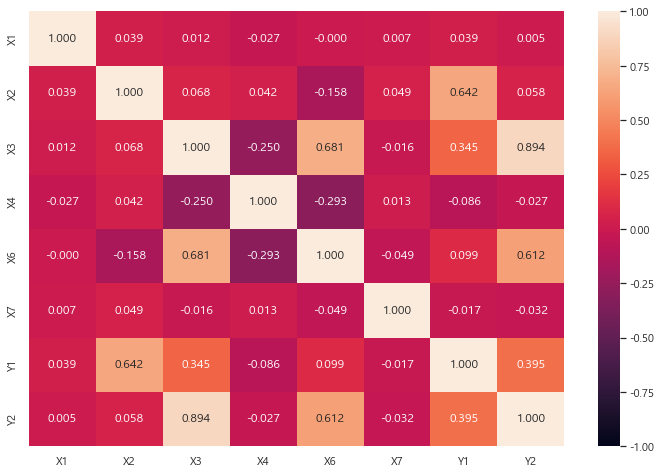

In [5]:
plt.figure(figsize = (12,8))
sns.heatmap(data = df_train.corr(), annot=True, fmt = '.3f', vmin = -1, vmax = 1)

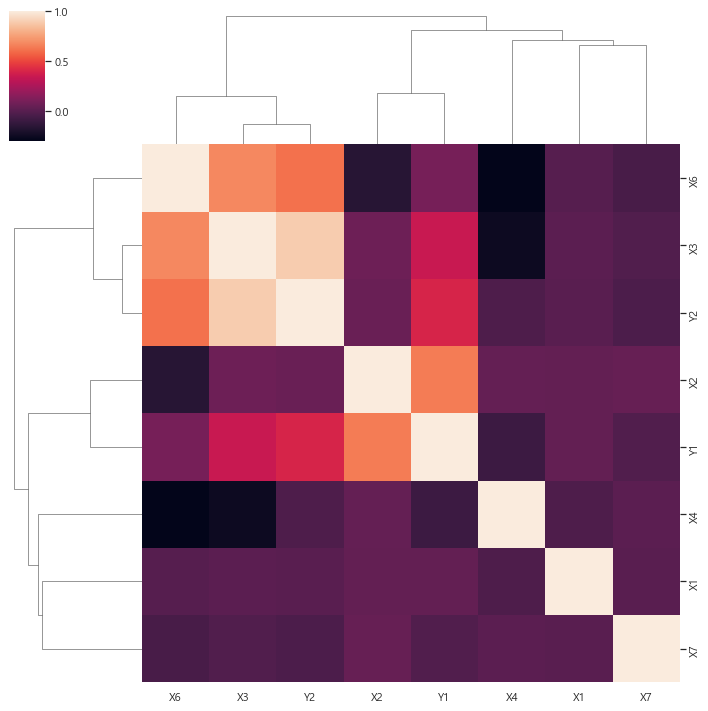

In [6]:
sns.clustermap(df_train.corr()) # 상관계수가 유사한 것끼리 묶어준다.

## 3. Numeric 데이터 산포도 

### 전범위

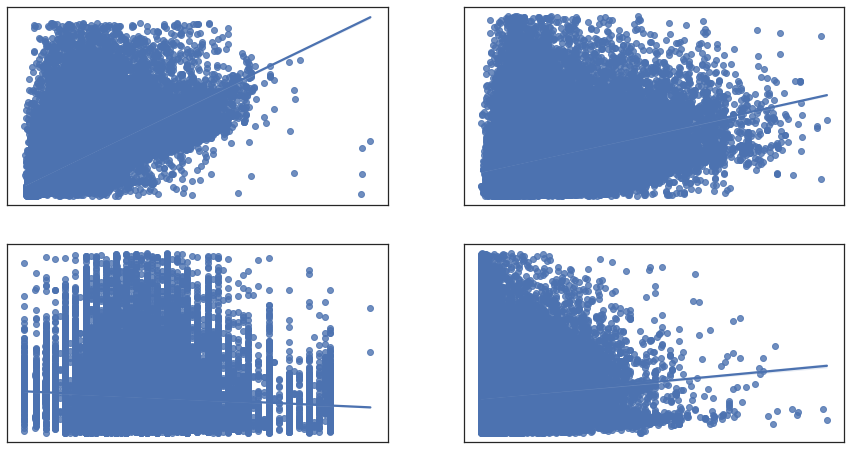

In [7]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y1', data=df_train, ax=axs[row][col])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

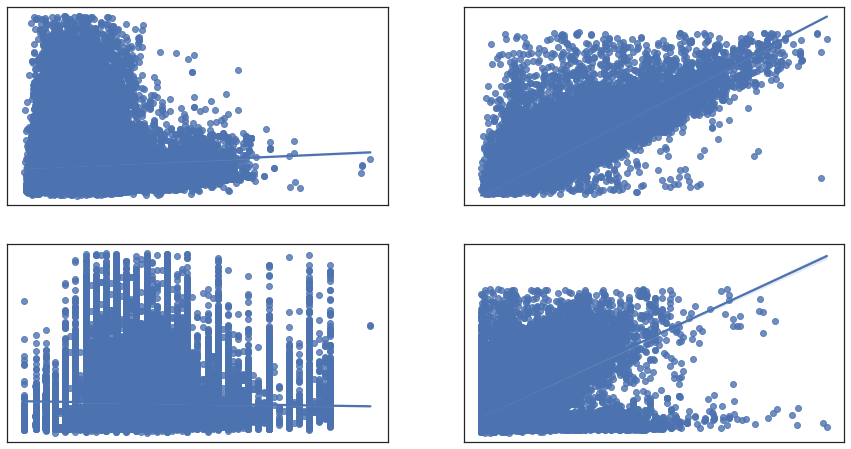

In [8]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y2', data=df_train, ax=axs[row][col])
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

### 범위 축소

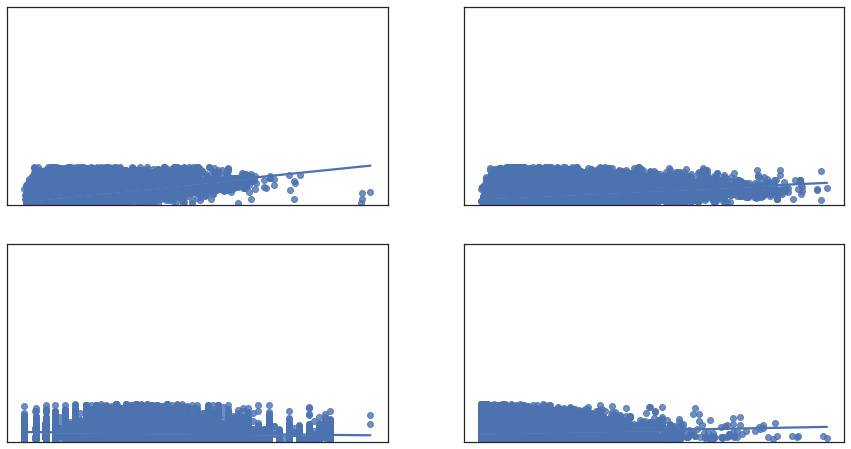

In [9]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y1', data=df_train, ax=axs[row][col])
    ax.set(ylim=(0, 10000))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

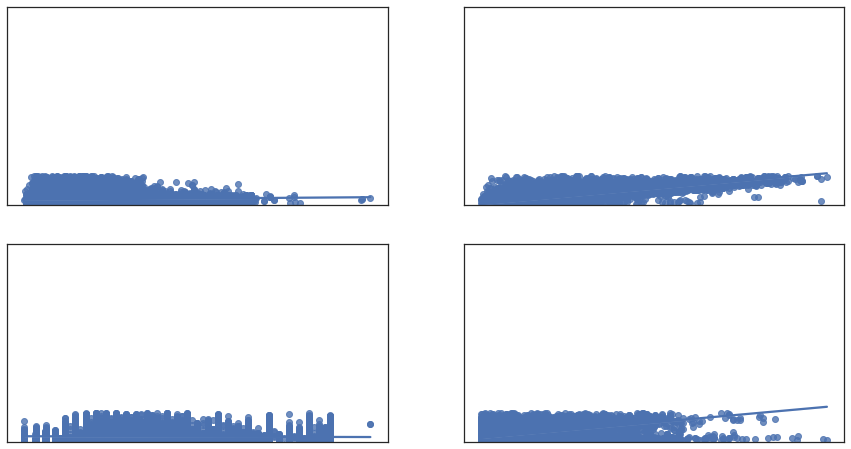

In [10]:
fig, axs = plt.subplots(figsize=(15,8), ncols=2, nrows=2)
lm_features = ['X2', 'X3', 'X4','X6']
for i, feature in enumerate(lm_features):
    row = int(i/2)
    col = i % 2
    ax = sns.regplot(x=feature, y='Y2', data=df_train, ax=axs[row][col])
    ax.set(ylim=(0,80000))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)

## 4. 범주형 데이터 Boxplot

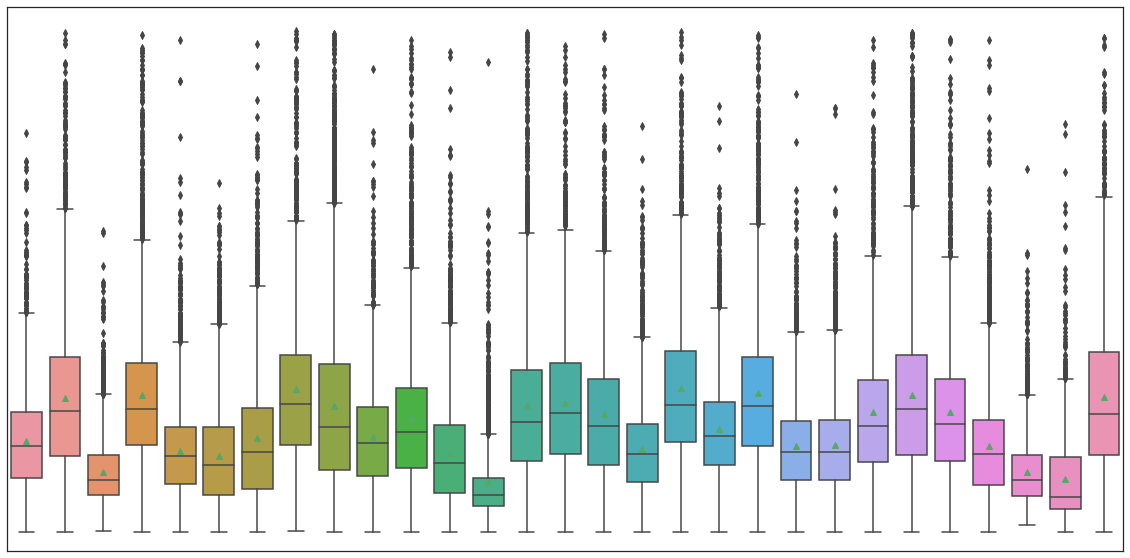

In [11]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,2000)
ax = sns.boxplot(x='X8', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

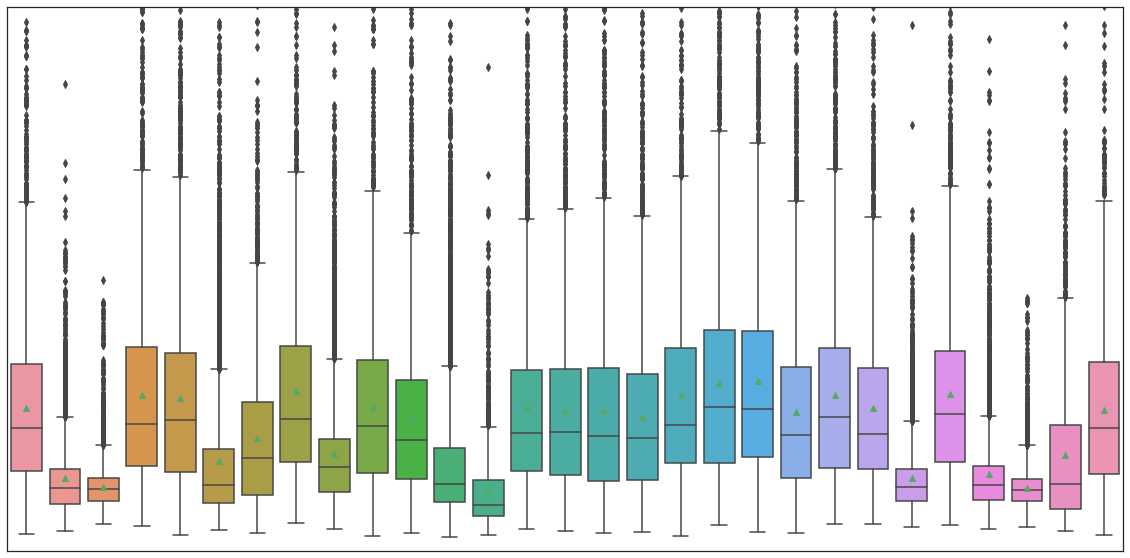

In [12]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X8', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

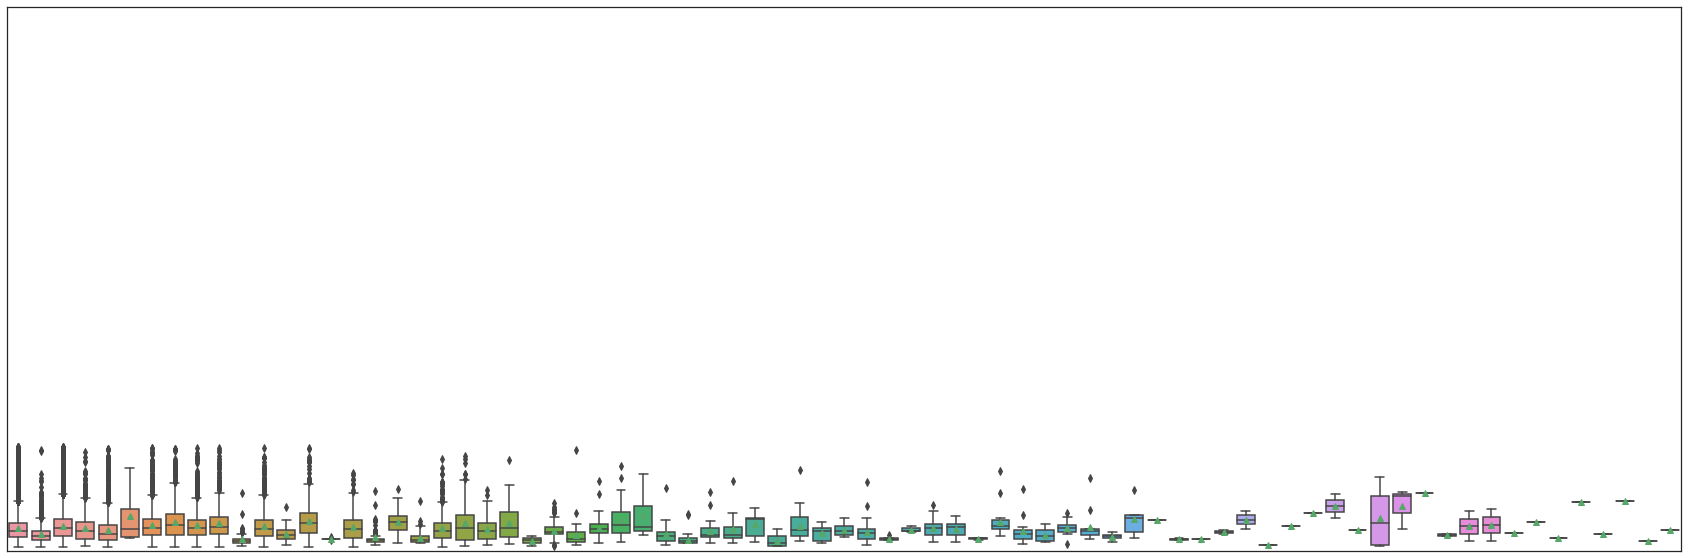

In [13]:
figure = plt.figure(figsize=(30,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X5', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

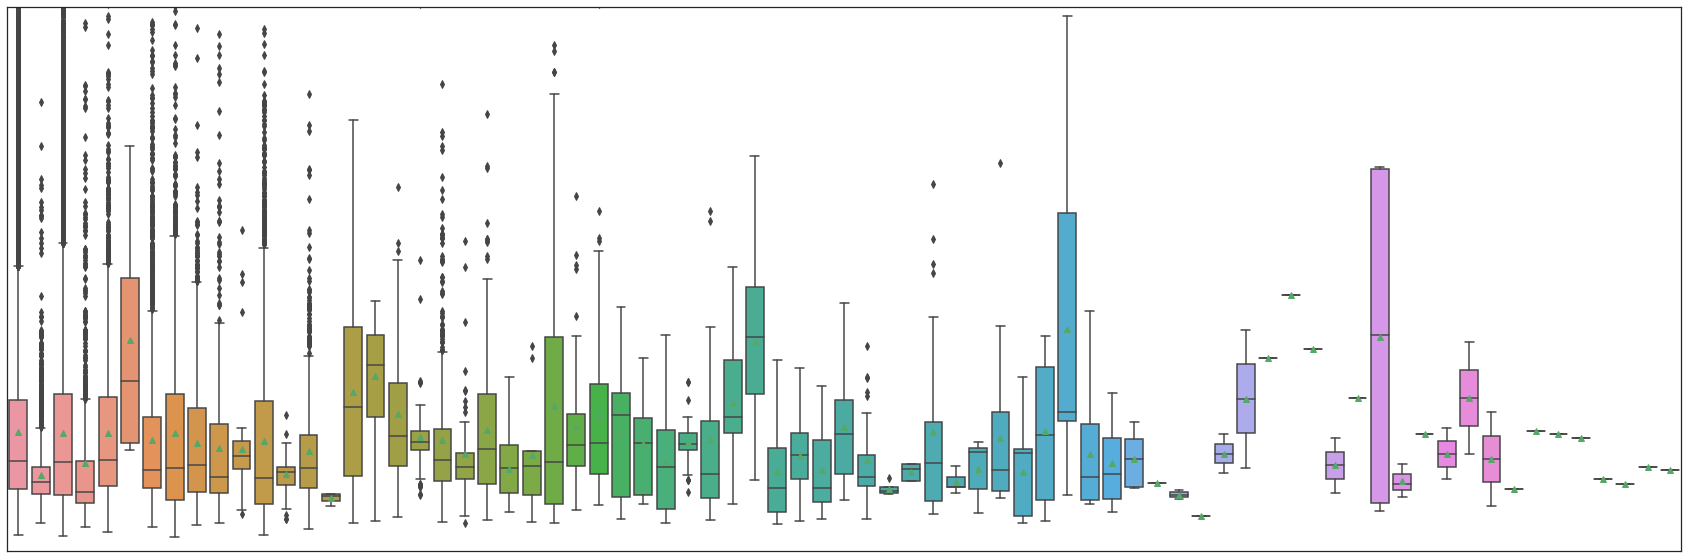

In [14]:
figure = plt.figure(figsize=(30,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X5', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

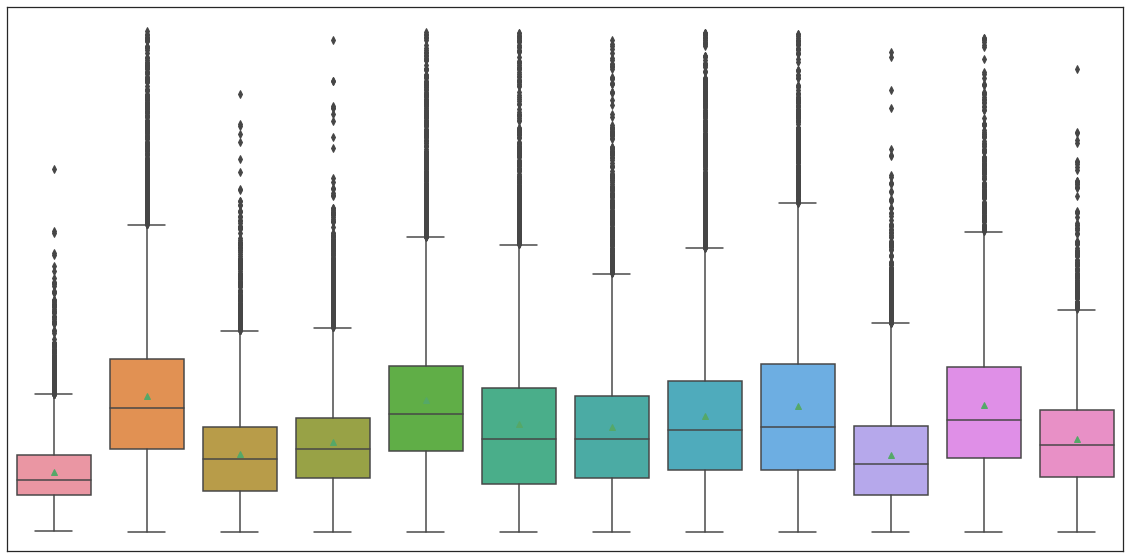

In [15]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,2000)
ax = sns.boxplot(x='X7', y='Y1', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

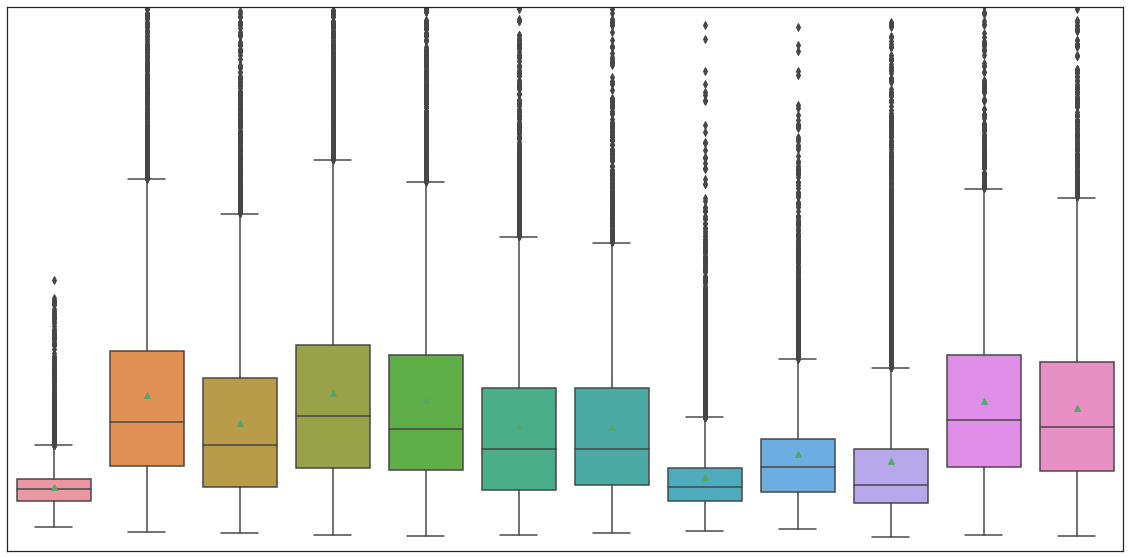

In [16]:
figure = plt.figure(figsize=(20,10))
plt.ylim(0,10000)
ax = sns.boxplot(x='X7', y='Y2', data=df_train, showmeans=True)
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)